In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Extracting Data from the Home_consumption_dataset to Dataframe
pow_df = pd.read_csv("powerconsumption.csv")
# pow_df['Datetime']=pd.to_datetime(pow_df.Datetime)
pow_df['Datetime'] = pd.to_datetime(pow_df['Datetime'])
#pow_df.set_index('Datetime', inplace=True)
pow_df.head()


,Datetime,Temperature,Humidity,WindSpeed,Power_Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,0.083,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,0.081,63650.44627


In [4]:
grouped_data = pow_df.groupby(pd.Grouper(key='Datetime', freq='D'))
result = grouped_data[['Temperature', 'Humidity', 'WindSpeed', 'Power_Consumption']].sum()
result['Temperature'] = grouped_data['Temperature'].median().round(3)
result['Humidity'] = grouped_data['Humidity'].mean().round(3)
result['WindSpeed'] = grouped_data['WindSpeed'].mean().round(3)
result['Power_Consumption(MWh)'] = (result['Power_Consumption'] / 1000).round(3)

result.reset_index(inplace=True)
result.head()

,Datetime,Temperature,Humidity,WindSpeed,Power_Consumption,Power_Consumption(MWh)
0,2017-01-01,11.305,68.519,0.315,9.226342e+06,9226.342
1,2017-01-02,12.875,71.456,0.077,9.539709e+06,9539.709
2,2017-01-03,11.820,74.982,0.077,9.826635e+06,9826.635
3,2017-01-04,9.640,75.460,0.082,9.859047e+06,9859.047
4,2017-01-05,9.905,71.040,0.084,9.864148e+06,9864.148


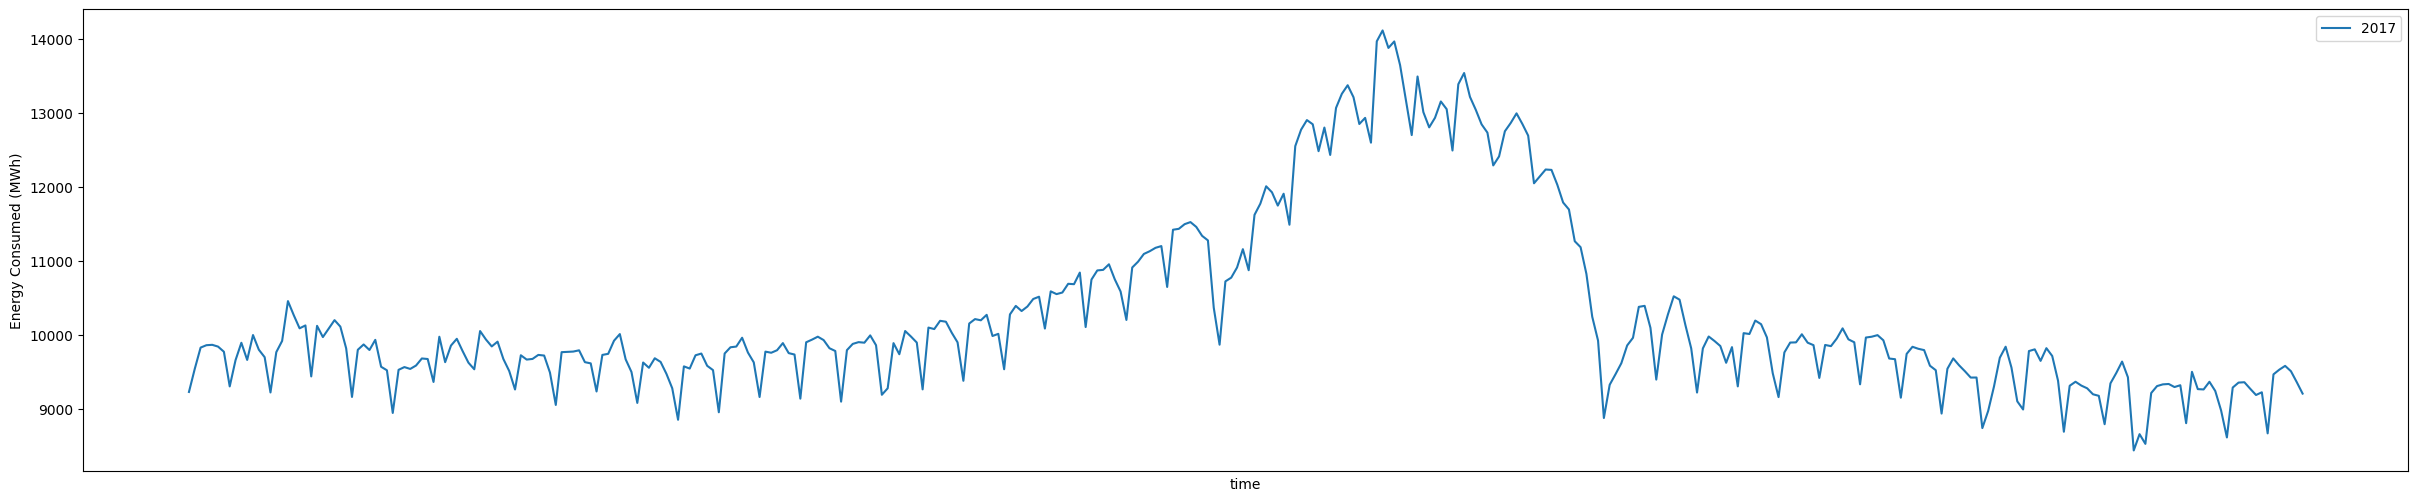

In [5]:
df = result
plt.figure(figsize=(30,6))
plt.plot(df['Datetime'], df['Power_Consumption(MWh)'], label = '2017')
plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False)
plt.ylabel("Energy Consumed (MWh)")
plt.xlabel("time")
plt.legend()
plt.show()

In [6]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(df) * .80)
 
#Splitting the dataset
train_data = df[:training_data_len].iloc[:,1:6] 
test_data = df[training_data_len:].iloc[:,1:6]
print(train_data.shape, test_data.shape)

(292, 5) (72, 5)


In [7]:
# Selecting consumption values
dataset_train = train_data['Power_Consumption(MWh)'].values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(292, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# translating all consumption values compared to the max consumption value in the dataset 
#(0.2 = this value is 20% of the max consumption in the dataset)
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[200:209])
print(len(scaled_train))

[[0.82849834]
 [0.75966777]
 [0.77542153]
 [0.71178781]
 [0.97208414]
 [1.        ]
 [0.95507516]
 [0.97175373]
 [0.91097094]]
292


In [9]:
# Same Pre-processing for test data
# Selecting consumption values for test_data
dataset_test = test_data['Power_Consumption(MWh)'].values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(scaled_test[15:25])
print(len(scaled_test))

[[0.7030363 ]
 [0.21552838]
 [0.38095954]
 [0.61681612]
 [0.89357697]
 [1.        ]
 [0.79879915]
 [0.47344677]
 [0.39469306]
 [0.9579768 ]]
72


In [10]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print("\nThe 50 predictors:", X_train[:50])
        print("\nThe results of the recent 50 predictors", y_train[:50])
        print()


The 50 predictors: [array([0.07143326, 0.13090522, 0.1853591 , 0.19151037, 0.19247845,
       0.18788891, 0.17471603, 0.08563952, 0.15311541, 0.19774951,
       0.15371931, 0.21760866, 0.17997171, 0.16073409, 0.07013135,
       0.17370467, 0.2024848 , 0.30476133, 0.26859083, 0.23486798,
       0.2422703 , 0.11134364, 0.2412728 , 0.21240423, 0.23401585,
       0.25591651, 0.23924989, 0.1833286 , 0.05863501, 0.17974112,
       0.19340896, 0.1791657 , 0.20525109, 0.13613471, 0.12707595,
       0.01752064, 0.12823932, 0.13531693, 0.13056683, 0.13931206,
       0.15744134, 0.15603524, 0.09707437, 0.21327666, 0.14795045,
       0.19058308, 0.2079204 , 0.17635006, 0.14658249, 0.12966365])]

The results of the recent 50 predictors [0.22784540825893185]


The 50 predictors: [array([0.07143326, 0.13090522, 0.1853591 , 0.19151037, 0.19247845,
       0.18788891, 0.17471603, 0.08563952, 0.15311541, 0.19774951,
       0.15371931, 0.21760866, 0.17997171, 0.16073409, 0.07013135,
       0.17370467, 0.

In [11]:
#Same processing for the test dataset
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [12]:
# The training data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (242, 50, 1) y_train : (242, 1)


In [13]:
# The testing data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (22, 50, 1) y_test : (22, 1)


In [14]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD    
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [15]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'Adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])
regressorLSTM.summary()

c:\Users\samyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Training/Fitting the model, epochs = number of times the training is done, more number of times is better for efficiency
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 24)

Epoch 1/24


242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0031 - loss: 0.0184
Epoch 2/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0040 - loss: 0.0110
Epoch 3/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0038 - loss: 0.0076
Epoch 4/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0075 - loss: 0.0082
Epoch 5/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0038 - loss: 0.0066
Epoch 6/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0084 - loss: 0.0077
Epoch 7/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0196 - loss: 0.0070
Epoch 8/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0054 - loss: 0.0080
Epoch 9/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0063 - loss: 0.0070
Epoch 10/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0086 - loss: 0.0056
Epoch 11/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0162 - loss: 0.0061
Epoch 12/24
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accura

In [17]:
# predictions with X_test data
y_LSTM = regressorLSTM.predict(X_test)
# scaling back from 0-1 to original
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


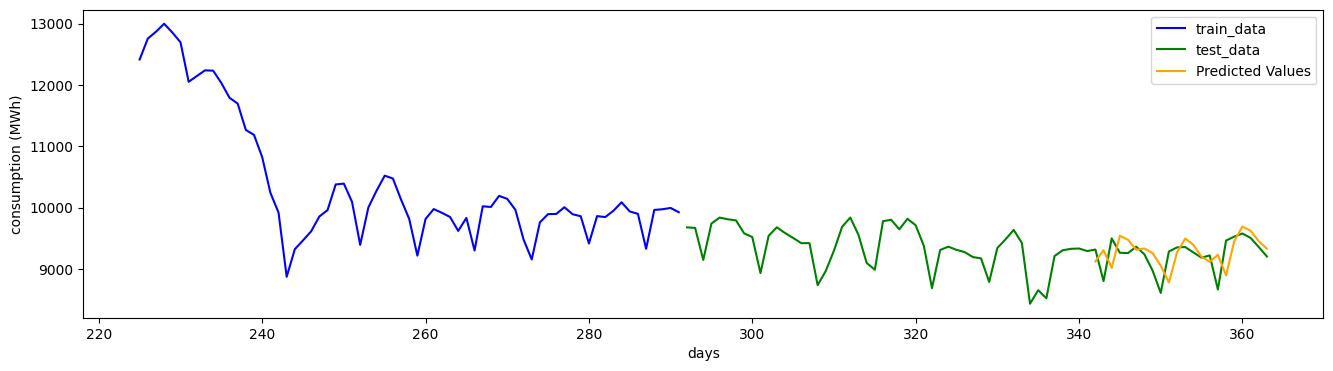

In [26]:
#Plot for LSTM predictions
plt.figure(figsize=(16,4))
plt.plot(train_data.index[225:], train_data['Power_Consumption(MWh)'][225:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data['Power_Consumption(MWh)'], label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_LSTM_O, label = "Predicted Values", color = "orange")
plt.legend()

plt.xlabel("days")
plt.ylabel("consumption (MWh)")
 
plt.show()

In [27]:
import keras
regressorLSTM.save("regressorLSTM_consumption.keras")
loaded_model = keras.saving.load_model("regressorLSTM_consumption.keras")

In [28]:
# predictions with X_test data
y_LSTM = loaded_model.predict(X_test)
# scaling back from 0-1 to original
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


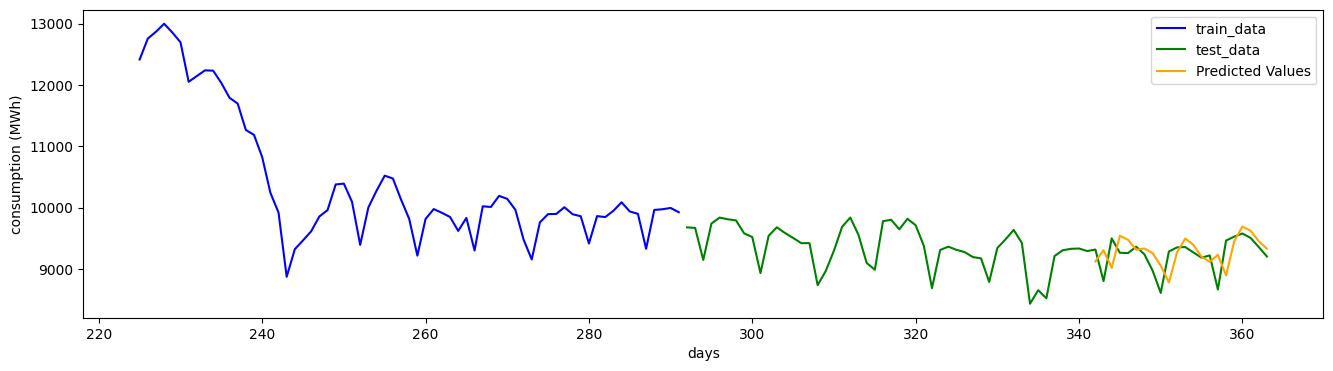

In [29]:
#Plot for LSTM predictions
plt.figure(figsize=(16,4))
plt.plot(train_data.index[225:], train_data['Power_Consumption(MWh)'][225:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data['Power_Consumption(MWh)'], label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_LSTM_O, label = "Predicted Values", color = "orange")
plt.legend()

plt.xlabel("days")
plt.ylabel("consumption (MWh)")
 
plt.show()